## EXP-12
**NAME:** **ASWIN.L** **Reg No:** **212224230028**

In [71]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [72]:
w_glass = cv2.imread('image_01.png', cv2.IMREAD_GRAYSCALE)
wo_glass = cv2.imread('image_02.png', cv2.IMREAD_GRAYSCALE)
group = cv2.imread('image_03.png', cv2.IMREAD_GRAYSCALE)

In [73]:
w_glass1 = cv2.resize(w_glass, (1000, 1000))
wo_glass1 = cv2.resize(wo_glass, (1000, 1000)) 
group1 = cv2.resize(group, (1000, 1000))

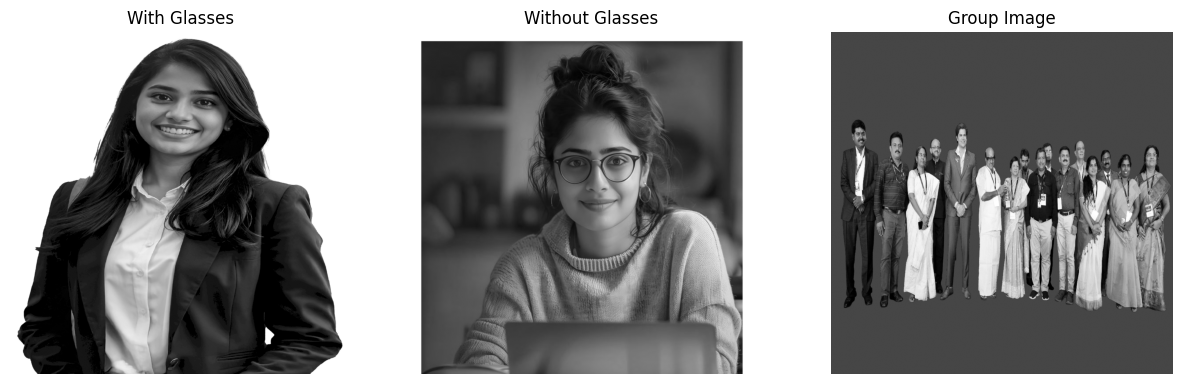

In [74]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1);plt.imshow(w_glass1,cmap='gray');plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(wo_glass1,cmap='gray');plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(group1,cmap='gray');plt.title('Group Image');plt.axis('off')
plt.show()

In [75]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def detect_and_display(image):
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 10)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

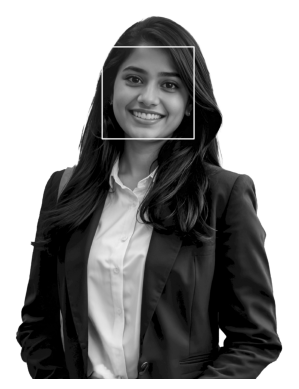

In [76]:
result = detect_and_display(w_glass)

In [77]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye-checkpoint.xml')
def detect_eyes(image):
    face_img = image.copy()
    eyes = eye_cascade.detectMultiScale(face_img)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(face_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return face_img
w_glass = detect_eyes(w_glass)
wo_glass = detect_eyes(wo_glass)
group = detect_eyes(group)

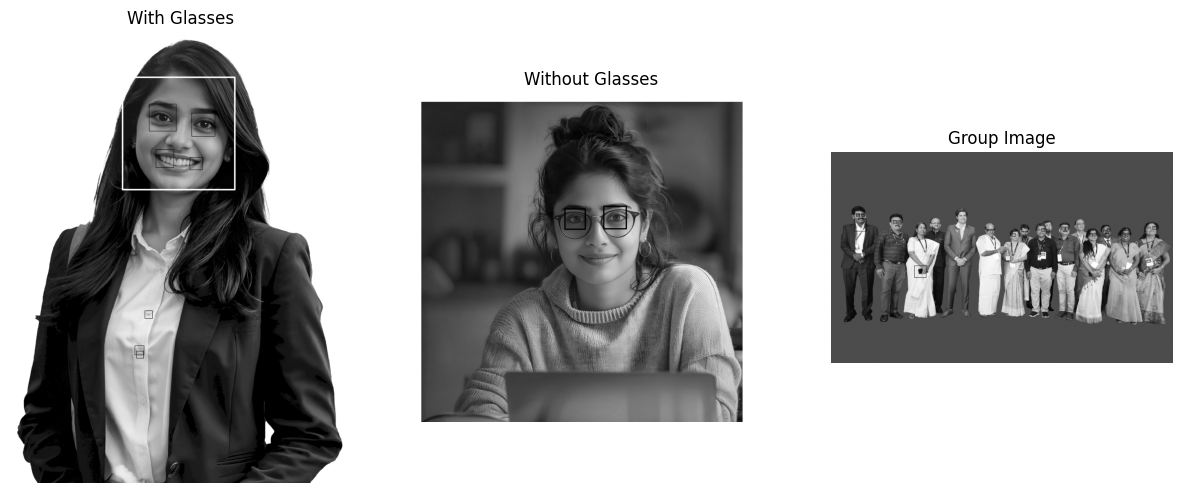

In [78]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1);plt.imshow(w_glass,cmap='gray');plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(wo_glass,cmap='gray');plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(group,cmap='gray');plt.title('Group Image');plt.axis('off')
plt.show()

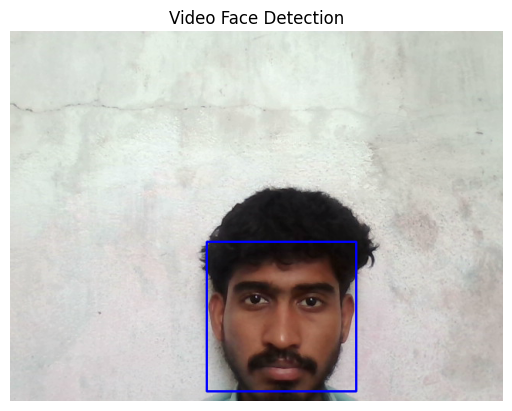

In [106]:
# Load the face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Show frame inline with matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Video Face Detection")
    plt.show()

    # Break after one frame display (to avoid infinite plots in Jupyter)
    break

cap.release()

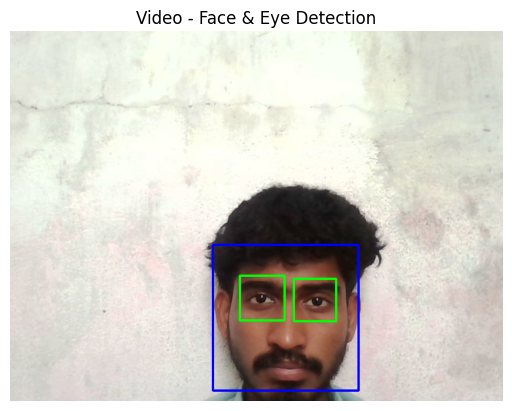

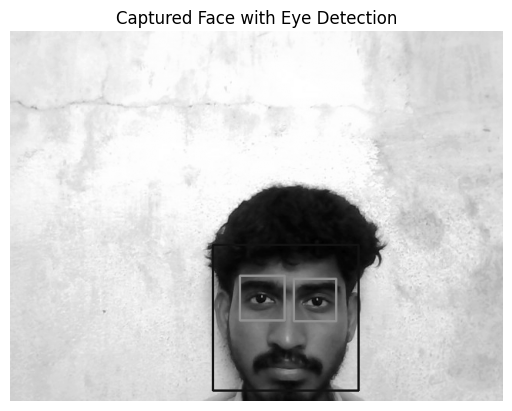

In [107]:
from IPython.display import clear_output, display

# Load Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def new_detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return frame

# Start video capture
video_capture = cv2.VideoCapture(0)
captured_frame = None   # store snapshot if needed

while True:
    ret, frame = video_capture.read()
    if not ret:
        print("No frame captured from camera.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = new_detect(gray, frame)

    # Show inline in Jupyter
    clear_output(wait=True)
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Video - Face & Eye Detection")
    display(plt.gcf())

    # Simulate key press logic in Jupyter:
    # Instead of cv2.waitKey, break after one frame
    captured_frame = canvas.copy()   # store snapshot
    break

video_capture.release()

# Save snapshot safely
if captured_frame is not None and captured_frame.size > 0:
    cv2.imwrite('captured_face_eye.png', captured_frame)
    captured_image = cv2.imread('captured_face_eye.png', cv2.IMREAD_GRAYSCALE)
    plt.imshow(captured_image, cmap='gray')
    plt.title('Captured Face with Eye Detection')
    plt.axis('off')
    plt.show()
else:
    print("No valid frame to save.")

In [47]:
# Step 1: Read the image and convert it to RGB for displaying
image = cv2.imread('your_image_1.jpg')  # Replace with your actual image file path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

(-0.5, 745.5, 320.5, -0.5)

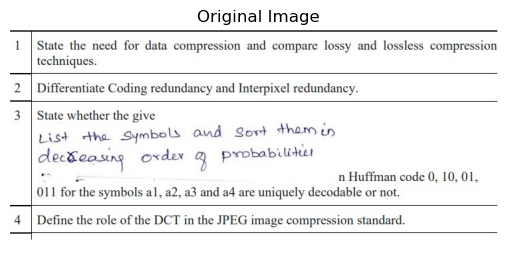

In [54]:
# Original Image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

In [48]:
# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale


In [49]:
# Step 3: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Apply Gaussian blur (5x5 kernel)

In [50]:
# Step 5: Use Canny edge detector to find edges
edges = cv2.Canny(blurred_image, 50, 150)  # Detect edges using Canny (thresholds 50 and 150)

(-0.5, 745.5, 320.5, -0.5)

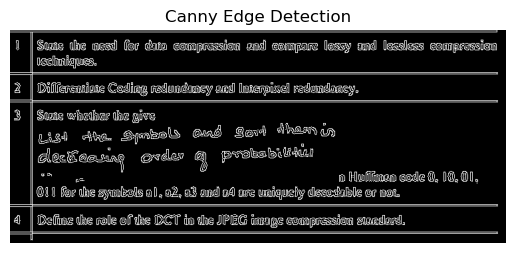

In [55]:
# Canny Edge Detection
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

In [51]:
# Step 6: Find contours in the edged image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [63]:
# Step 7: Filter contours based on area and draw bounding boxes
result_image = image.copy()  # Create a copy of the original image to draw bounding boxes
for contour in contours:
    if cv2.contourArea(contour) > 50:  # Filter out small areas
        x, y, w, h = cv2.boundingRect(contour)  # Get the bounding box for the contour
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw the rectangle

(-0.5, 745.5, 320.5, -0.5)

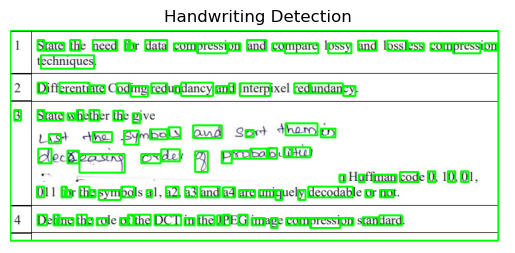

In [64]:
# Handwriting Detection Result
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Handwriting Detection")
plt.axis('off')

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
config_file = 'deploy.prototxt'  # Path to the config file
weights = 'mobilenet_iter_73000.caffemodel'  # Path to the weights file

In [28]:
# Step 2: Use a pretrained DNN model (MobileNet-SSD v3)
net = cv2.dnn.readNetFromCaffe(config_file, weights)

In [29]:
# Step 4: Create a class label and print the same
class_labels = {0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
                5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable',
                12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep',
                18: 'sofa', 19: 'train', 20: 'tvmonitor'}

In [30]:
# Step 5: Read the image
image = cv2.imread('download.webp')  # Replace with your image path
(h, w) = image.shape[:2]

In [31]:
# Convert image to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
# Create a blob for DNN processing
blob = cv2.dnn.blobFromImage(image, 0.007843, (300, 300), 127.5)

In [33]:
# Step 6: Set the model and threshold to 0.5
net.setInput(blob)
detections = net.forward()

In [36]:
# Step 7: Flatten the index, confidence
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:  # Confidence threshold
        index = int(detections[0, 0, i, 1])  # Get class index
        label = class_labels[index]  # Get label name
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
# Step 8: Draw rectangles and labels on the image
        cv2.rectangle(image_rgb, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

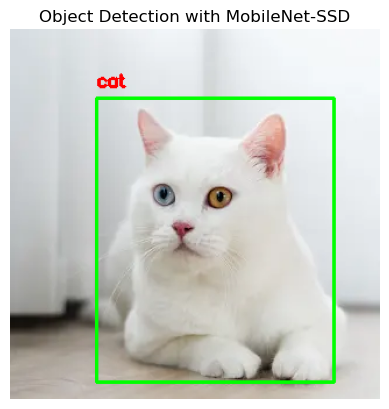

In [37]:
# Step 9: Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title("Object Detection with MobileNet-SSD")
plt.axis("off")
plt.show()